# What are the total number of reported cases and deaths in each continent (a comparison of cases and deaths)?


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bolkonsky/covid19")

print("Path to dataset files:", path)

Path to dataset files: /Users/macbook/.cache/kagglehub/datasets/bolkonsky/covid19/versions/1


In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter 
import matplotlib.ticker as mtick
import seaborn as sns 
from datasets import load_dataset

path = '/Users/macbook/Covid_19_C_and_D_analysis/1_COVID-19_C_and_D/owid-covid-data.csv'

df = pd.read_csv(path)
df = df.copy()

df['total_deaths'] = df['total_deaths'].fillna(0).astype(int)
df['total_cases'] = df['total_cases'].fillna(0).astype(int)
df['date'] = pd.to_datetime(df['date'])

In [16]:
df_continent_country = df.groupby(['continent'])[['total_cases', 'total_deaths']].sum()
df_continent = df_continent_country.reset_index()
df_continent

,continent,total_cases,total_deaths
0,Africa,90226617,2140158
1,Asia,517161533,11580581
2,Europe,398597068,29361361
3,North America,615147765,27041681
4,Oceania,2546632,43717
5,South America,446248455,15642922


- Datasets created by continents

/var/folders/h2/ykjhmn6n4fddrbmq6w6gbg7r0000gn/T/ipykernel_2525/3235345383.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(),
/var/folders/h2/ykjhmn6n4fddrbmq6w6gbg7r0000gn/T/ipykernel_2525/3235345383.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(),


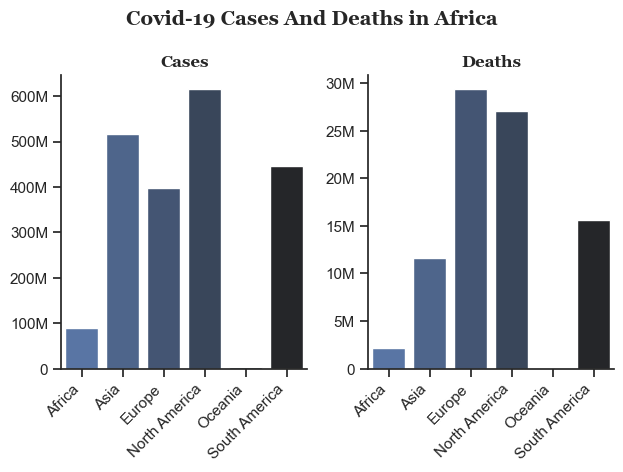

In [17]:
fig, ax = plt.subplots(1, 2)

value = lambda x, pos: f"{x/1_000_000:.0f}M" if x >= 1_000_000 else (f"{x/1000}K" if x >= 1000 else str(int(x)))
      
sns.set_theme(style='ticks')
sns.despine()
sns.barplot(data=df_continent, 
            x='continent', 
            y='total_cases', 
            ax=ax[0], 
            hue='continent' , 
            palette='dark:b_r')
ax[0].set_title('Cases', 
                fontweight='bold', 
                fontfamily='Georgia')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.barplot(data=df_continent, 
            x='continent', 
            y='total_deaths', 
            ax=ax[1], 
            hue='continent', 
            palette='dark:b_r')
ax[1].set_title('Deaths', 
                fontweight='bold', 
                fontfamily='Georgia')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

# Rotate x-axis labels
for axis in ax:
    axis.set_xticklabels(axis.get_xticklabels(), 
                         rotation=45, 
                         ha='right')
    axis.yaxis.set_major_formatter(mtick.FuncFormatter(value))

fig.suptitle('Covid-19 Cases And Deaths in Africa', 
             fontweight='bold', 
             fontfamily='Georgia')
plt.tight_layout()
plt.show()